In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_data = pd.read_csv('./data/data_multi.csv', names=['area', 'bedrooms', 'price'])
df_data = df_data.apply(lambda column: (column - column.mean()) / column.std())
df_data.insert(0, 'ones', 1.0)
df_data.head()

,ones,area,bedrooms,price
0,1.0,0.130010,-0.223675,0.475747
1,1.0,-0.504190,-0.223675,-0.084074
2,1.0,0.502476,-0.223675,0.228626
3,1.0,-0.735723,-1.537767,-0.867025
4,1.0,1.257476,1.090417,1.595389


In [3]:
x_data = df_data.loc[:, ['ones', 'area', 'bedrooms']].values
y_data = df_data.loc[:, ['price']].values
print("x_data.shape = {}\ny_data.shape = {}".format(x_data.shape, y_data.shape))

x_data.shape = (47, 3)
y_data.shape = (47, 1)


In [4]:
LEARNING_RATE = 0.01
NUM_EPOCH = 500

In [5]:
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, x_data.shape, name='x')
    y = tf.placeholder(tf.float32, y_data.shape, name='y')

with tf.name_scope('logits'):
    w = tf.get_variable('weights', (x_data.shape[1], 1), initializer=tf.constant_initializer())
    y_hat = tf.matmul(x, w, name='y_hat')

with tf.name_scope('loss'):
    loss_op = 1 / (2 * len(x_data)) * tf.matmul((y_hat - y), (y_hat - y), transpose_a=True)

with tf.name_scope('train'):
    opt = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
    train_op = opt.minimize(loss_op)

In [6]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./summary/v2/', sess.graph)
    loss_history = []
    for epoch in range(1, NUM_EPOCH + 1):
        _, loss_value, w_value = sess.run([train_op, loss_op, w], feed_dict={x: x_data, y: y_data})
        loss_history.append(float(loss_value))
        if epoch % 20 == 0:
            print("epoch: {}, loss = {}, w_value = {}".format(epoch, loss_value, w_value.flatten()))
writer.close()

epoch: 20, loss = [[0.358181]], w_value = [-5.5879301e-11  1.4891572e-01  7.1348228e-02]
epoch: 40, loss = [[0.2778277]], w_value = [-1.8626399e-11  2.6545322e-01  1.1673299e-01]
epoch: 60, loss = [[0.2305665]], w_value = [-4.4703474e-10  3.5760424e-01  1.4361557e-01]
epoch: 80, loss = [[0.20179722]], w_value = [-6.2398597e-10  4.3129212e-01  1.5743265e-01]
epoch: 100, loss = [[0.18353307]], w_value = [-5.401669e-10  4.909155e-01  1.621366e-01]
epoch: 120, loss = [[0.17137687]], w_value = [-5.0757054e-10  5.3974879e-01  1.6059221e-01]
epoch: 140, loss = [[0.16288395]], w_value = [-9.2200914e-10  5.8023626e-01  1.5486820e-01]
epoch: 160, loss = [[0.15667568]], w_value = [-3.3993250e-10  6.1420906e-01  1.4645109e-01]
epoch: 180, loss = [[0.15195875]], w_value = [-2.4912855e-10  6.4304453e-01  1.3640232e-01]
epoch: 200, loss = [[0.1482637]], w_value = [2.6542718e-10 6.6778392e-01 1.2547334e-01]
epoch: 220, loss = [[0.14530256]], w_value = [2.3399505e-10 6.8921953e-01 1.1419022e-01]
epoch:

In [7]:
# tensorboard --logdir ./ --host localhost

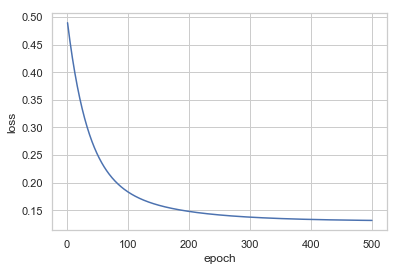

In [8]:
sb.set(context='notebook', style='whitegrid')
ax = sb.lineplot(x=np.arange(1, NUM_EPOCH + 1), y=loss_history)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()